In [2]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13, 8)

## Summary:

* [Column types](#column_types)
* [Game types](#game_types)
* [Number of shots per season](#num_shots_per_season)
* [Number of unique teams](#num_unique_teams)
* [Average shots made per type per period](#avg_shots_per_type_per_period)
* [Average shots made per season per period](#avg_shots_per_season_per_period)
* [Shots per game](#shots_per_game)
* [Average shots per game](#avg_shots_per_game)
* [Shots per player](#shots_per_player)
* [Average shots per player](#avg_shots_per_player)
* [Top 5 playeer shots made per period](#top5_players_per_period)
* [Average shots made per top 5 players](#avg_shots_made_per_top5)
* [Time bins (there was a small problem with this, you can see the process I went trough in order to realise what was it)](#time_bins)
    * [Realisation](#solution)
* [Fixed time bins](#fixed_time_bins)
    * [Average shots made per season per period](#time_bins_game_season_period)
    * [Shots made by player per period](#time_bins_game_player_period)

I have looked at:
* Count of shots made per game type
* Count of shots made per season
* Average shots made per game type
* Average shots made per season
* Distribution of shots per game
* Distribution of average shots made per game
* Distribution of count of shots per player (whole time)
* Distribution of average shots made per player (whole time)
* Top 5 players count of shots per period
* Top 5 players average shots made per period
* Separate time in three different bins

Three columns I haven't touched at all:
* end_result
* play
* score

Play doesn't seem to carry a lot more information than _player_ and _shot_made_.

Potentially something to look at:
* Check shots made per team.
* Check shots made per winnig team.

__Normalise the averages from time bins section!__

In [3]:
data = pd.read_csv('/Users/hop/Downloads/coding-test/free_throws.csv')
data.shape

(618019, 11)

In [4]:
data.head()

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,1,7:26
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,0,7:26
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2006 - 2007,1,7:18


<a id="column_types"></a>
## Column types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618019 entries, 0 to 618018
Data columns (total 11 columns):
end_result    618019 non-null object
game          618019 non-null object
game_id       618019 non-null float64
period        618019 non-null float64
play          618019 non-null object
player        618019 non-null object
playoffs      618019 non-null object
score         618019 non-null object
season        618019 non-null object
shot_made     618019 non-null int64
time          618019 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 51.9+ MB


In [6]:
plots = data.copy()
plots['count'] = 1

<a id="game_types"></a>
## Separation of game types:

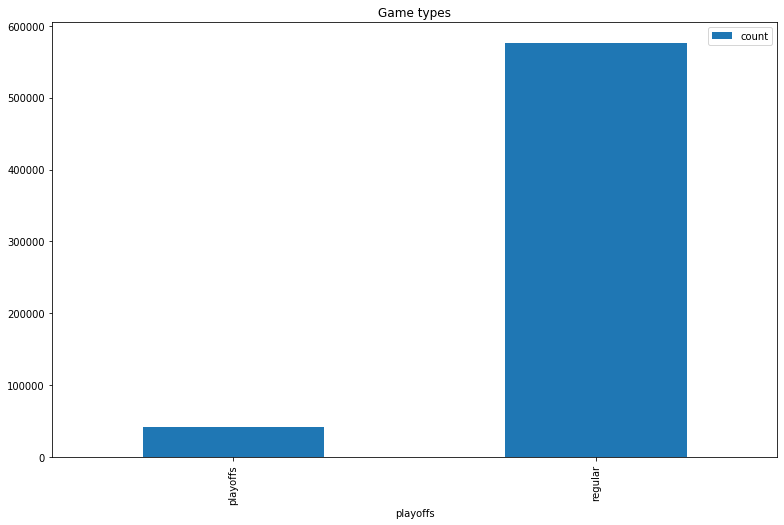

In [7]:
plots[['playoffs', 'count']].groupby('playoffs').sum().plot(kind='bar', title='Game types')

<a id="num_shots_per_season"></a>
## Number of shots per season:

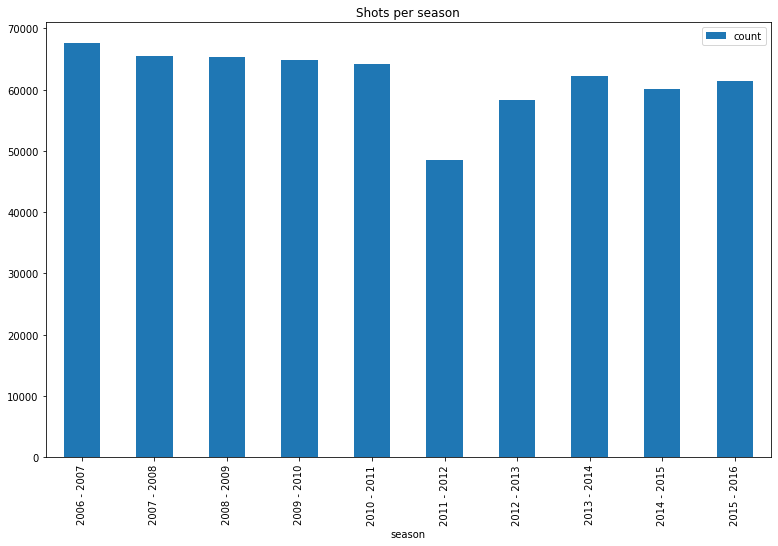

In [8]:
plots[['season', 'count']].groupby('season').sum().plot(kind='bar', title='Shots per season')

In [9]:
plots.player.nunique()

1098

<a id="num_unique_teams"></a>
## Number of unique teams:

In [10]:
teams = pd.DataFrame(plots.game.str.split('-').tolist(),
                                   columns = ['home', 'away'])
print(teams.shape)

one_col = pd.concat([teams['home'], teams['away']])
print(one_col.shape)

assert teams.shape[0]*2 == one_col.shape[0]

print(f'There are {one_col.nunique()} unique teams in the data.')

(618019, 2)
(1236038,)
There are 68 unique teams in the data.


<a id="avg_shots_per_type_per_period"></a>
## Average shots made per type per period:

In [11]:
avg_throws = plots[['playoffs', 'period', 'shot_made']].groupby(
    by=['playoffs', 'period']).mean().reset_index().set_index('period')
avg_throws

,playoffs,shot_made
period,,
1.0,playoffs,0.752699
2.0,playoffs,0.745096
3.0,playoffs,0.754206
4.0,playoffs,0.755799
5.0,playoffs,0.801061
6.0,playoffs,0.812500
7.0,playoffs,0.739130
1.0,regular,0.756553
2.0,regular,0.753834


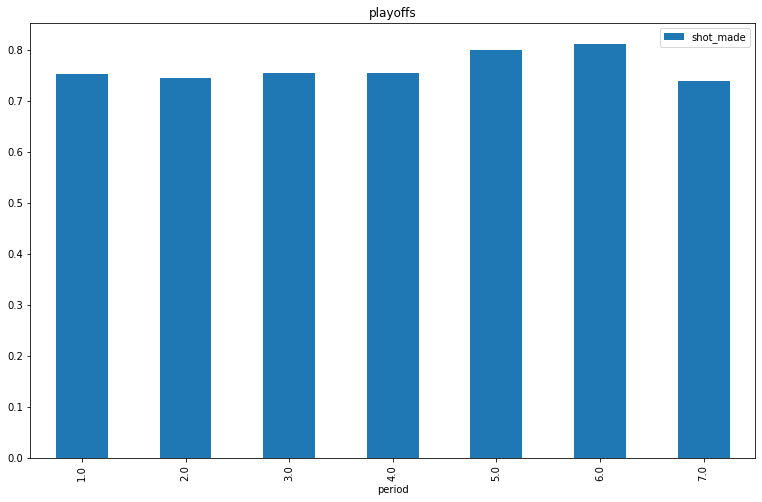

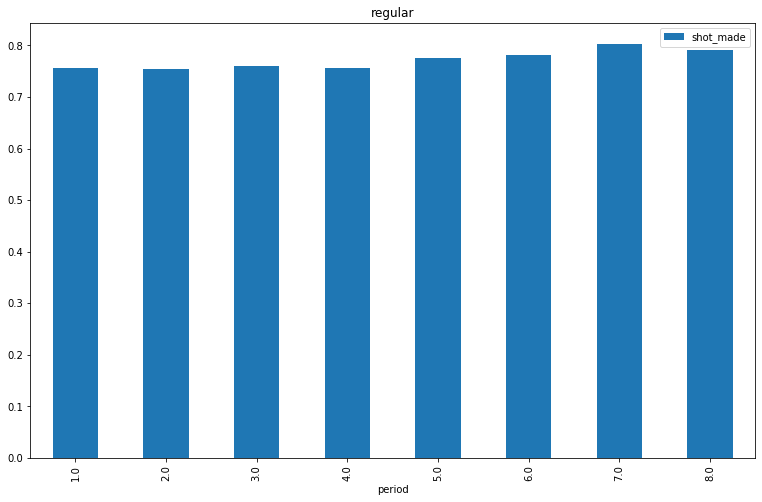

In [12]:
for tpe in avg_throws['playoffs'].unique():
    avg_throws[avg_throws['playoffs'] == tpe].plot(kind='bar', title=tpe)

<a id="avg_shots_per_season_per_period"></a>
## Average shots made per season per period

In [13]:
avg_throws_y = plots[['season', 'period', 'shot_made']].groupby(
    by=['season', 'period']).mean().reset_index().set_index('period')
avg_throws_y.head()

,season,shot_made
period,,
1.0,2006 - 2007,0.744387
2.0,2006 - 2007,0.753040
3.0,2006 - 2007,0.752441
4.0,2006 - 2007,0.754251
5.0,2006 - 2007,0.776034


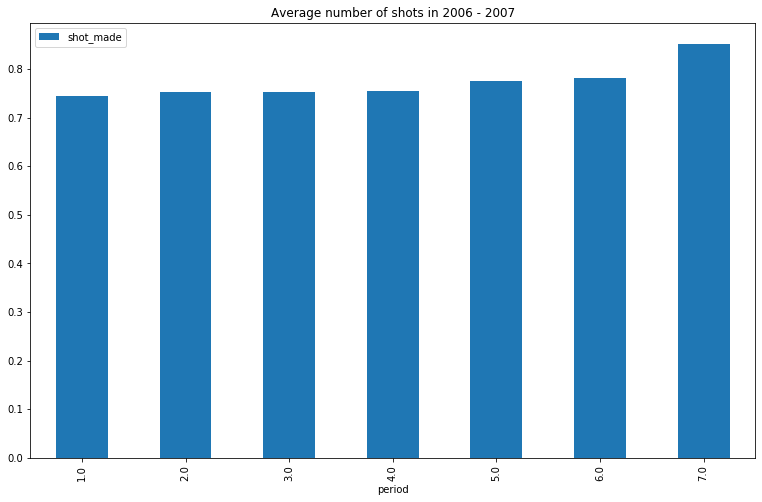

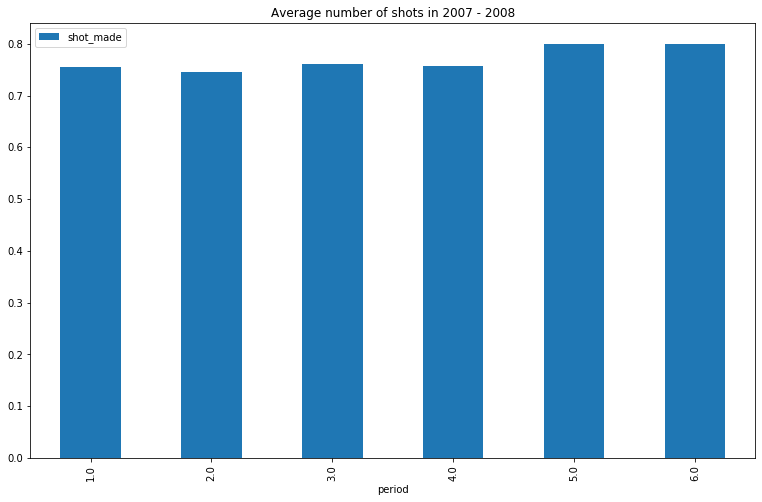

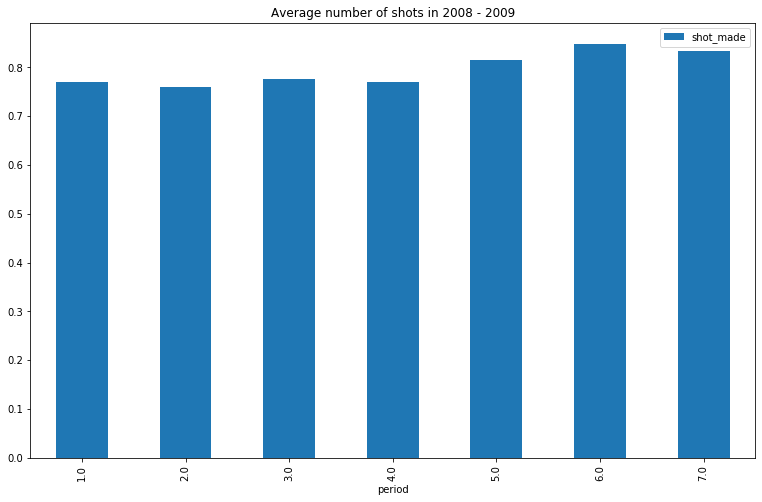

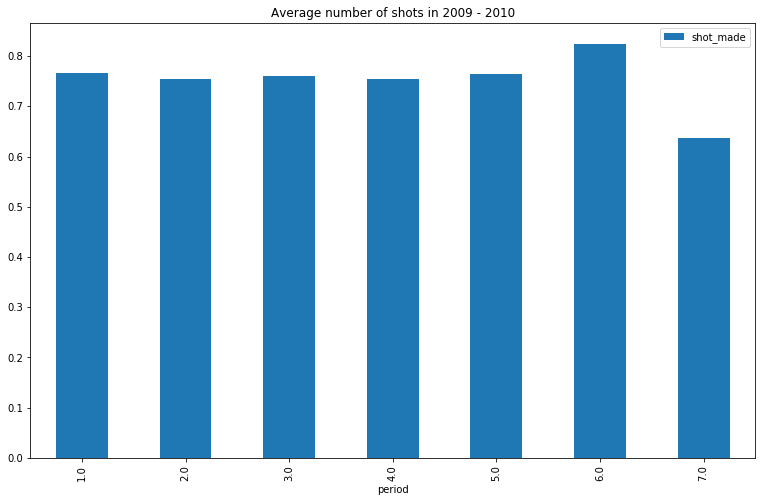

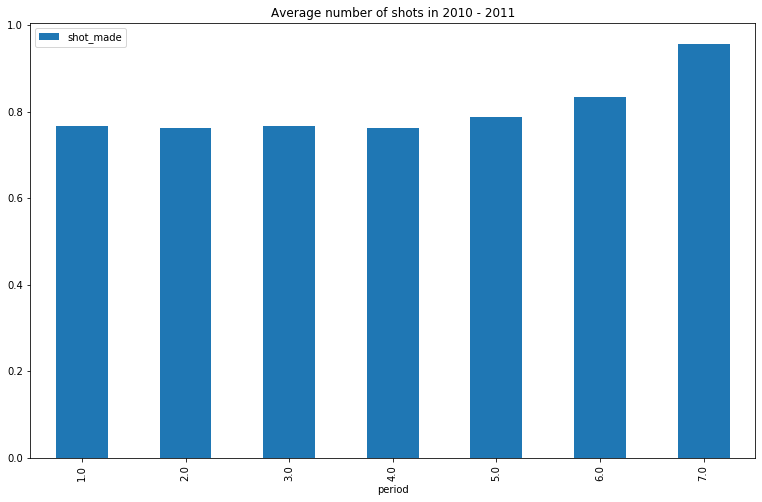

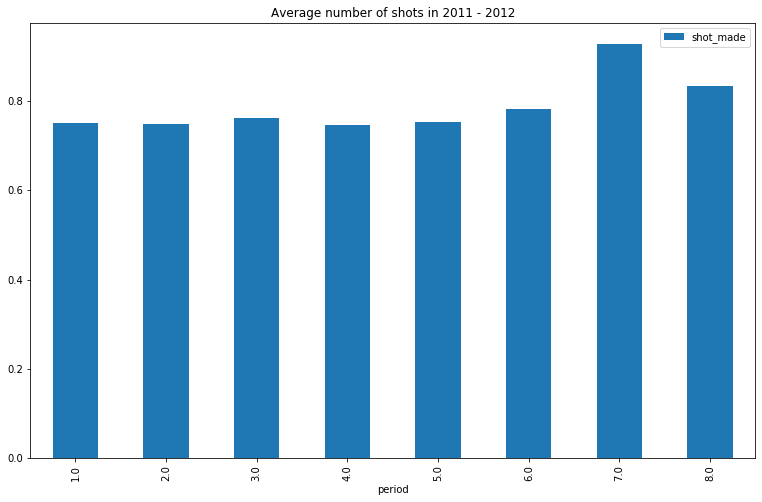

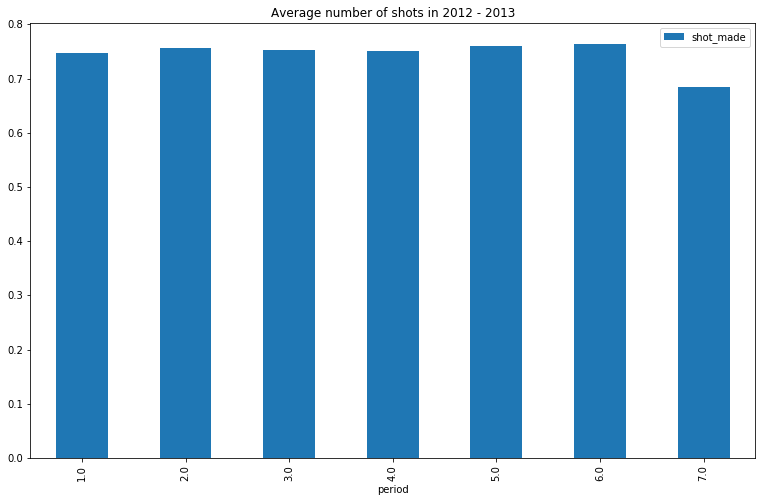

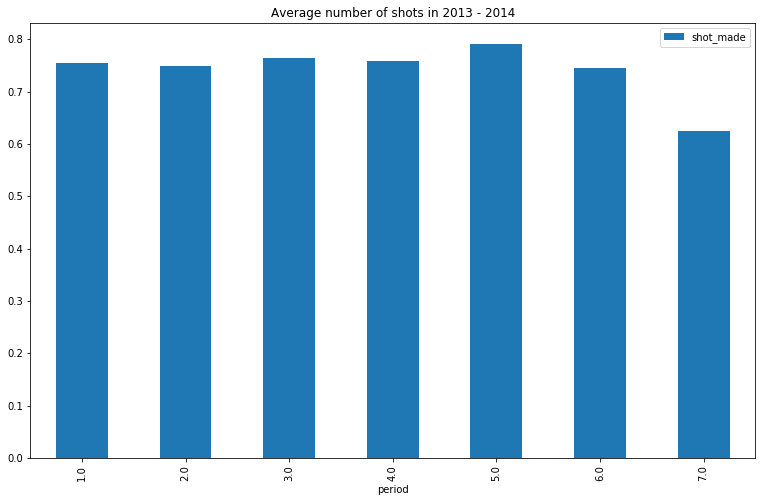

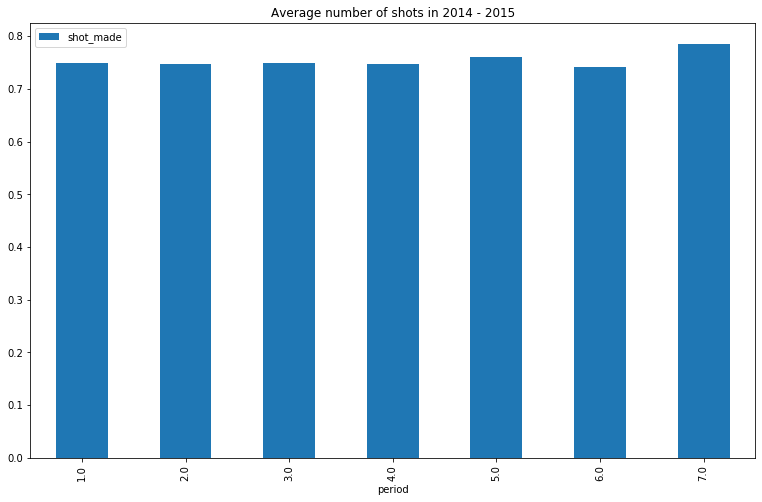

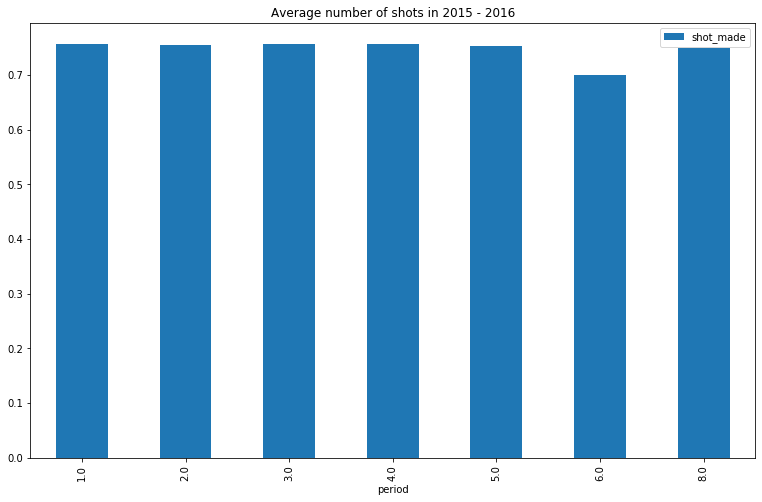

In [14]:
for yy in avg_throws_y.season.unique():
    avg_throws_y[avg_throws_y['season'] == yy].plot(kind='bar', title=f'Average number of shots in {yy}')

<a id="shots_per_game"></a>
## Shots per game

In [15]:
num_of_shots_per_game = plots[['game_id', 'shot_made', 'count']].groupby(
    by='game_id'
).sum()['count'].sort_values(ascending=False)
num_of_shots_per_game.head(20)

game_id
261118018.0    113
270104023.0    102
261227018.0     99
270113026.0     99
270215013.0     97
310301019.0     97
400793862.0     96
290401009.0     94
400489621.0     94
400793864.0     93
271217001.0     92
400277756.0     92
280408009.0     92
270221011.0     92
270112011.0     91
300419007.0     91
400828701.0     91
300430026.0     91
291029022.0     90
261217013.0     90
Name: count, dtype: int64

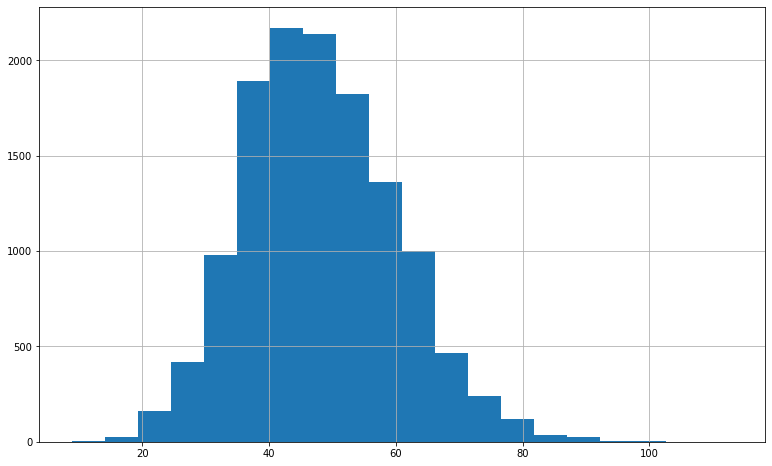

In [16]:
num_of_shots_per_game.hist(bins=20)

<a id="avg_shots_per_game"></a>
## Average shots made per game:

In [17]:
avg_shots_per_game = plots[['game_id', 'shot_made', 'count']].groupby(
    by='game_id'
).mean()['shot_made'].sort_values(ascending=False)
avg_shots_per_game.head(20)

game_id
320112015.0    1.000000
400579090.0    0.970588
311230002.0    0.970588
310423022.0    0.969697
400489102.0    0.968750
400278554.0    0.964286
400489191.0    0.962963
400278922.0    0.962963
400579467.0    0.960000
400828407.0    0.960000
270401021.0    0.957447
320518013.0    0.957143
400828796.0    0.956522
400828498.0    0.956522
310428003.0    0.954545
301120022.0    0.953488
400489641.0    0.951220
400828232.0    0.950000
400579520.0    0.950000
320404020.0    0.950000
Name: shot_made, dtype: float64

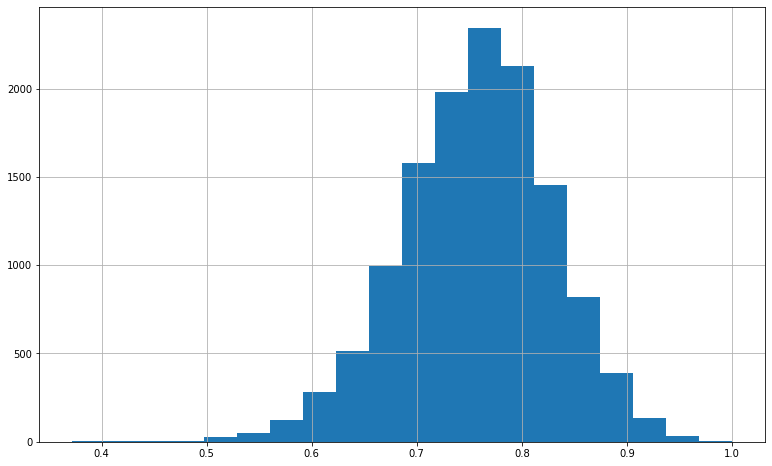

In [18]:
avg_shots_per_game.hist(bins=20)

<a id="shots_per_player"></a>
## Shots per player (whole time)

In [19]:
player_shots = plots[['player', 'shot_made']].groupby('player').sum().sort_values(by='shot_made', ascending=False)
player_shots.head(10)

,shot_made
player,
LeBron James,5957
Kevin Durant,5293
Kobe Bryant,4702
Carmelo Anthony,4360
Dwight Howard,4302
Dwyane Wade,4276
Dirk Nowitzki,4208
James Harden,3966
Russell Westbrook,3776


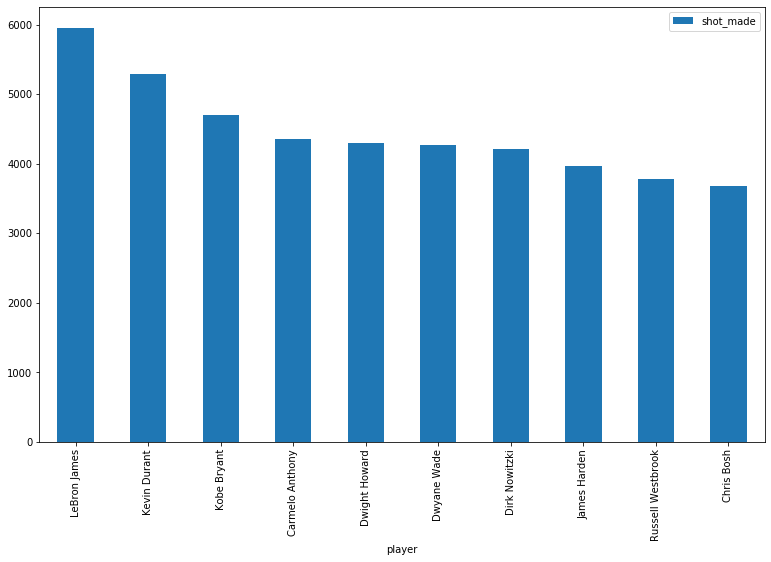

In [20]:
player_shots.head(10).plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114937a20>]],
      dtype=object)

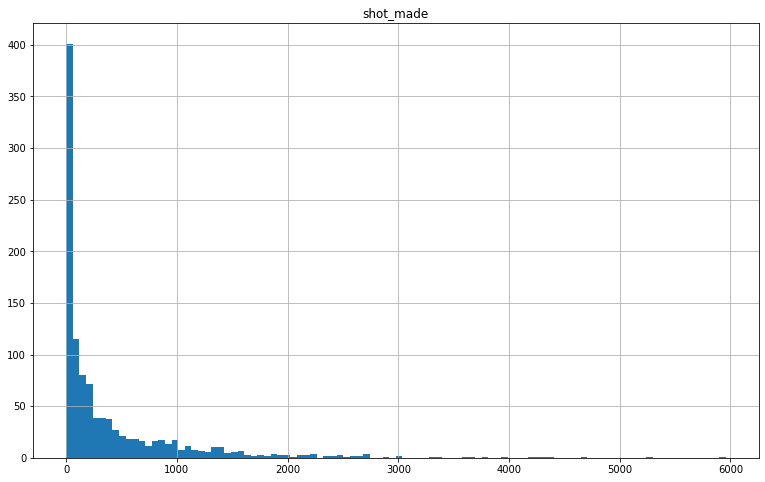

In [21]:
player_shots.hist(bins=100)

By looking at the above, there are some outliers and we'll probably need to remove them.

## Get distribution of just entry count

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1157e0f28>]],
      dtype=object)

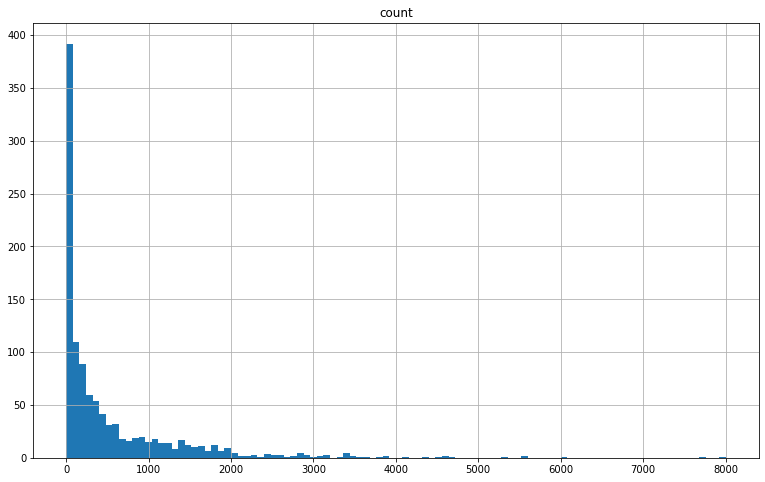

In [22]:
player_count_shots = plots[['player', 'count']].groupby('player').sum().sort_values(by='count', ascending=False)
player_count_shots.hist(bins=100)

<a id="avg_shots_per_player"></a>
## Average shots made per player

In [23]:
player_shots_avg = plots[['player', 'shot_made']].groupby('player').mean().sort_values(by='shot_made', ascending=False)
player_shots_avg.head(10)

,shot_made
player,
Desmon Farmer,1.0
Will Blalock,1.0
D.J. Stephens,1.0
Jose Barea,1.0
Tim Ohlbrecht,1.0
Eric Piatkowski,1.0
Tibor Pleiss,1.0
Kevin Willis,1.0
Cj Watson,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1161be0f0>]],
      dtype=object)

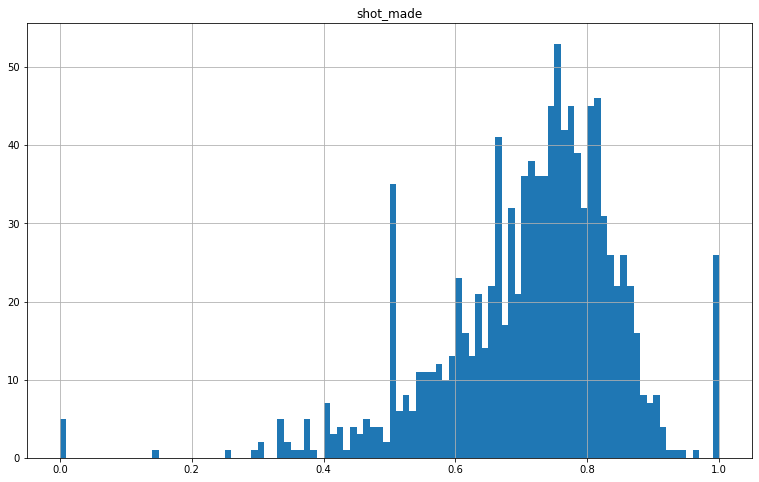

In [24]:
player_shots_avg.hist(bins=100)

* It looks like there are some outliers. Without digging too much into the dataset I suspect that the 26 players with 100% success have really low number of attended shots.

In [25]:
for player in player_shots_avg.reset_index().player.head(26).unique():
    print(f"Player: {player} attended {plots[plots.player == player].shape[0]} shots in total")

Player: Desmon Farmer attended 3 shots in total
Player: Will Blalock attended 6 shots in total
Player: D.J. Stephens attended 1 shots in total
Player: Jose Barea attended 7 shots in total
Player: Tim Ohlbrecht attended 1 shots in total
Player: Eric Piatkowski attended 6 shots in total
Player: Tibor Pleiss attended 2 shots in total
Player: Kevin Willis attended 2 shots in total
Player: Cj Watson attended 2 shots in total
Player: Roger Powell attended 2 shots in total
Player: Alex Kirk attended 2 shots in total
Player: Jerel McNeal attended 2 shots in total
Player: Jumaine Jones attended 2 shots in total
Player: Billy Thomas attended 2 shots in total
Player: Pat Connaughton attended 5 shots in total
Player: Keith Appling attended 2 shots in total
Player: Sherron Collins attended 1 shots in total
Player: Adonis Thomas attended 1 shots in total
Player: Eddie Gill attended 9 shots in total
Player: Derrick Byars attended 4 shots in total
Player: Grant Jerrett attended 1 shots in total
Player

* Correct!

<a id="top5_players_per_period"></a>
## Top 5 players shots made per period:

In [26]:
sum_throws_pl = plots[['period', 'shot_made', 'player']].groupby(
    by=['period', 'player']).sum().reset_index().set_index('period')
sum_throws_pl.head()

,player,shot_made
period,,
1.0,A.J. Price,29
1.0,Aaron Brooks,127
1.0,Aaron Gordon,40
1.0,Aaron Gray,39
1.0,Aaron Williams,10


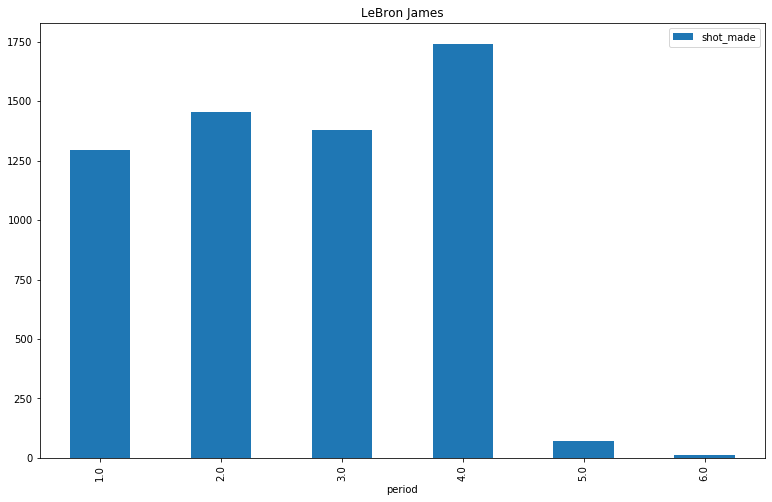

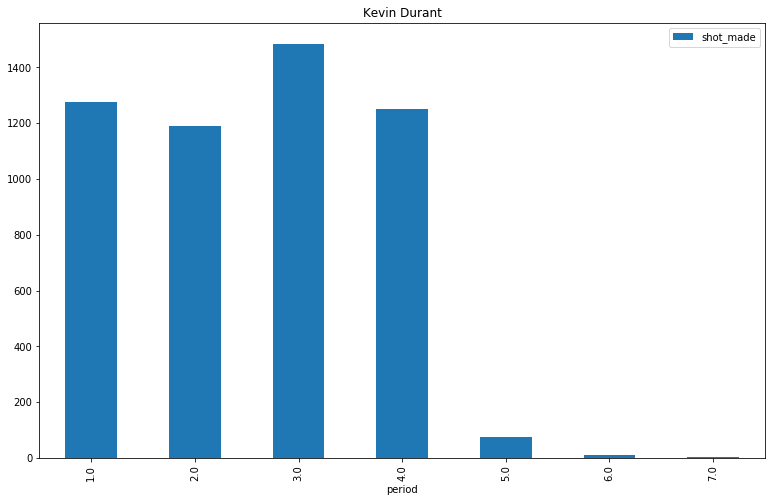

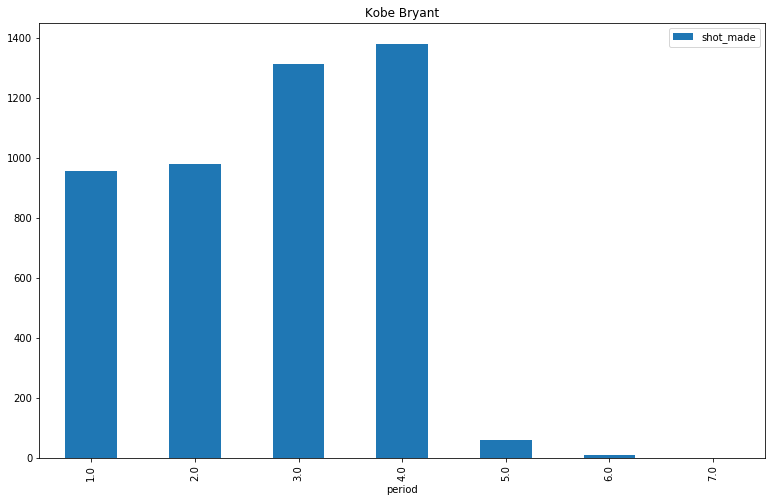

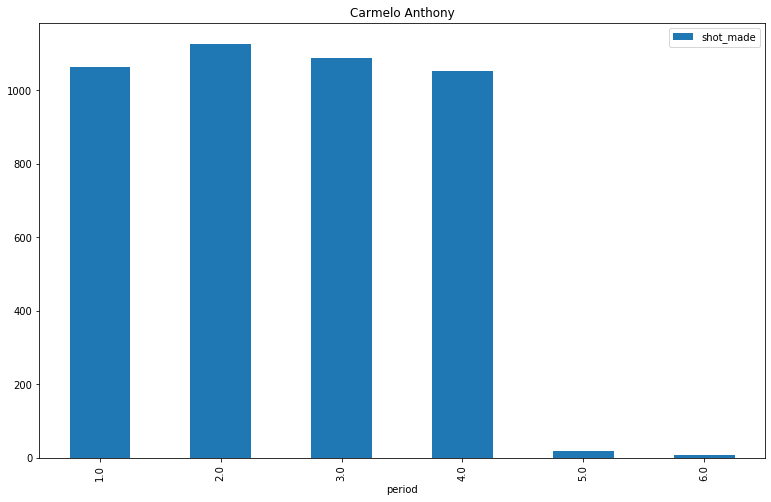

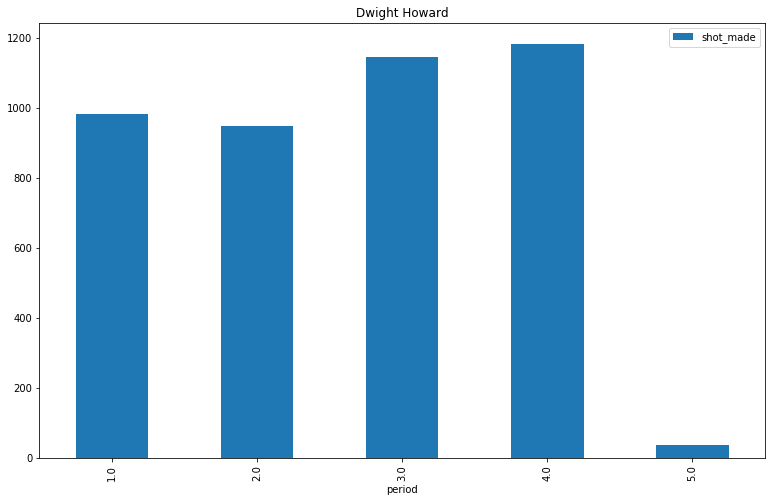

In [27]:
sorted_shots_per_player = sum_throws_pl.sort_values(by='shot_made', ascending=False)

for pl in player_shots.head().index:
    sum_throws_pl[sum_throws_pl['player'] == pl].plot(kind='bar', title=pl)

<a id="avg_shots_made_per_top5"></a>
## Average shots made by top 5 players

In [28]:
avg_throws_pl = plots[['period', 'shot_made', 'player']].groupby(
    by=['period', 'player']).mean().reset_index().set_index('period')
avg_throws_pl.head()

,player,shot_made
period,,
1.0,A.J. Price,0.725000
1.0,Aaron Brooks,0.858108
1.0,Aaron Gordon,0.784314
1.0,Aaron Gray,0.557143
1.0,Aaron Williams,0.833333


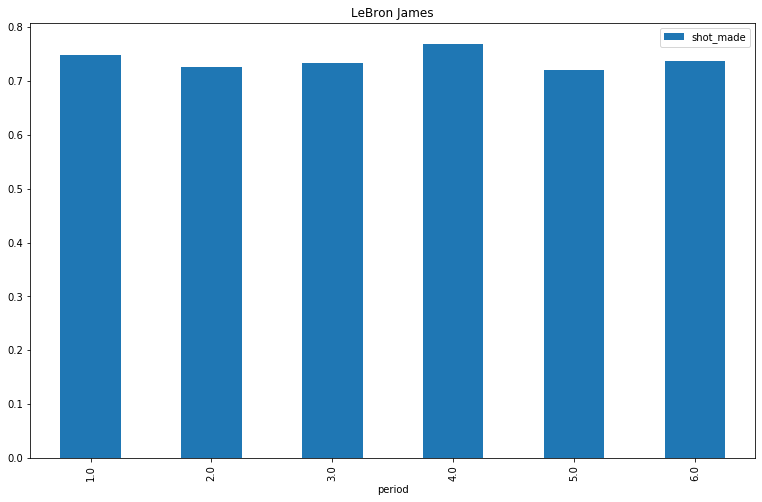

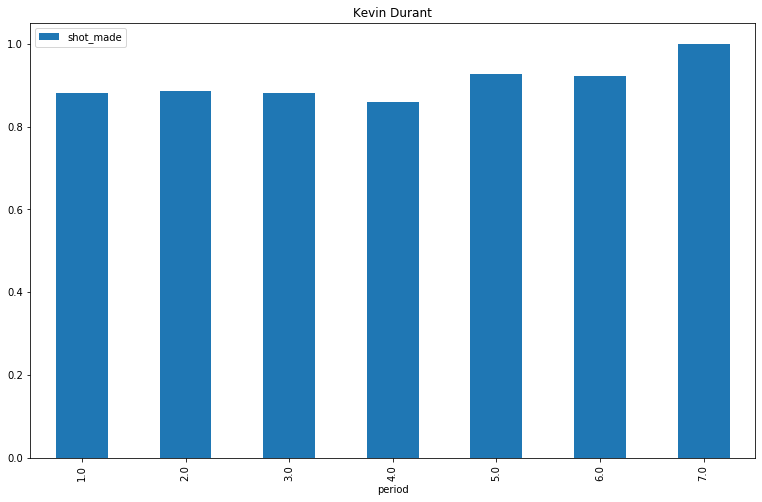

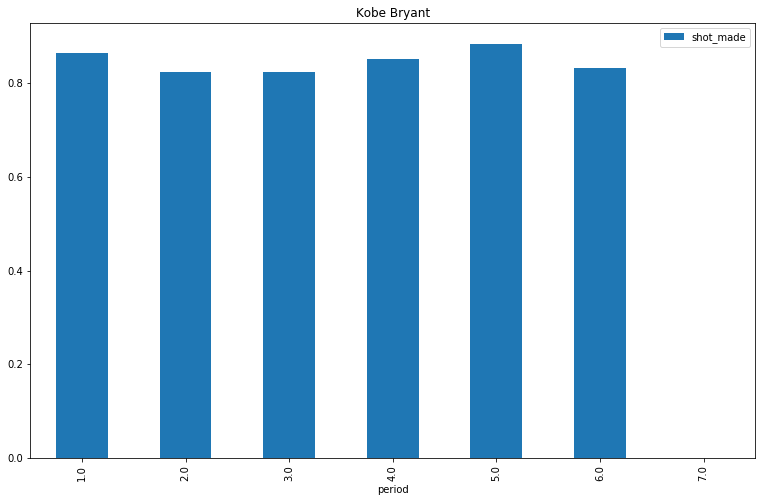

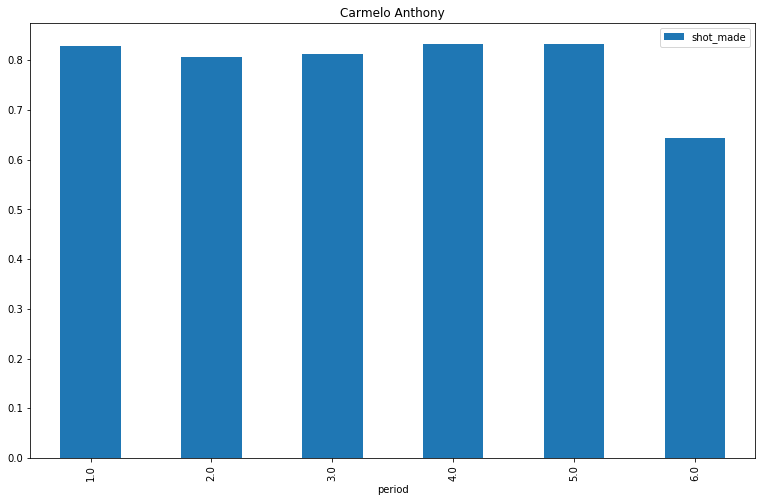

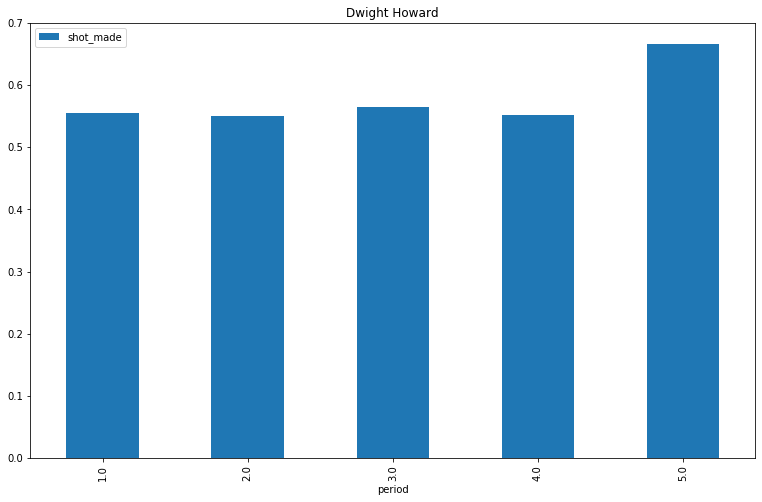

In [29]:
for pl in player_shots.head().index:
    avg_throws_pl[avg_throws_pl['player'] == pl].plot(kind='bar', title=pl)

<a id="time_bins"></a>
## Bins:

In [30]:
seconds = pd.DataFrame(plots.time.str.split(':').tolist(),
                                   columns = ['min', 'sec'])
print(seconds.head())

  min sec
0  11  45
1  11  45
2   7  26
3   7  26
4   7  18


In [31]:
plots['seconds'] = seconds['min'].astype(int)*60 + seconds['sec'].astype(int)

In [32]:
plots['time_bins'] = pd.cut(plots['seconds'], 3, labels =["beg","mid","end"], include_lowest=True)

In [33]:
plots.head()

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time,count,seconds,time_bins
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45,1,705,end
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45,1,705,end
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,1,7:26,1,446,mid
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,0,7:26,1,446,mid
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2006 - 2007,1,7:18,1,438,mid


In [34]:
plots.time_bins.unique()

[end, mid, beg]
Categories (3, object): [beg < mid < end]

In [35]:
avg_throws_bins = plots[['playoffs', 'period', 'shot_made', 'time_bins']].groupby(
    by=['playoffs', 'period', 'time_bins']).mean().reset_index()#.set_index(['period'])
avg_throws_bins.head()

,playoffs,period,time_bins,shot_made
0,playoffs,1.0,beg,0.758946
1,playoffs,1.0,mid,0.753263
2,playoffs,1.0,end,0.739444
3,playoffs,2.0,beg,0.752531
4,playoffs,2.0,mid,0.745559


## <font color=red>The values are not normalised. Each percentage shown in each bar represents the average shots made in the begining/middle/end of a particular period.</font>

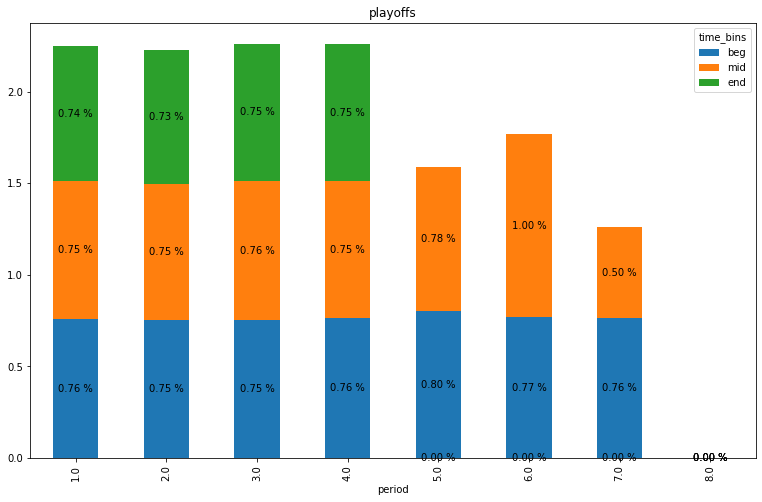

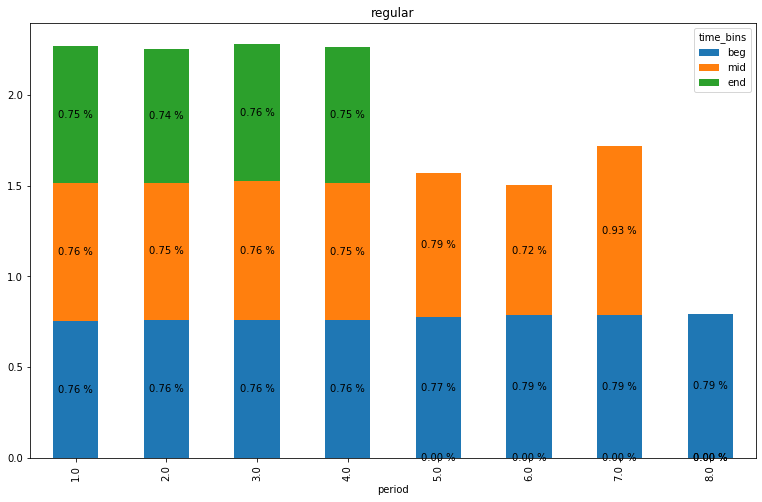

In [36]:
for tpe in avg_throws_bins.playoffs.unique():
    pivot_df = avg_throws_bins[avg_throws_bins['playoffs'] == tpe].pivot(index='period', columns='time_bins', values='shot_made')

    ax = pivot_df.loc[:,['beg','mid', 'end']].plot.bar(stacked=True, title=tpe)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.2f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')

* It looks like that after the fifth perion (including) there are no free shots made at the end of the periods.

In [37]:
avg_throws_bins = plots[['season', 'period', 'shot_made', 'time_bins']].groupby(
    by=['season', 'period', 'time_bins']).mean().reset_index()#.set_index(['period'])
avg_throws_bins.head()

,season,period,time_bins,shot_made
0,2006 - 2007,1.0,beg,0.749361
1,2006 - 2007,1.0,mid,0.738730
2,2006 - 2007,1.0,end,0.742227
3,2006 - 2007,2.0,beg,0.759262
4,2006 - 2007,2.0,mid,0.758540


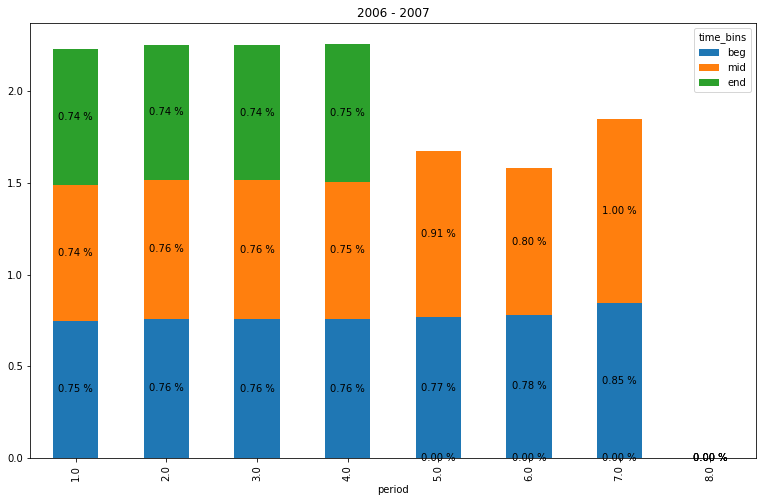

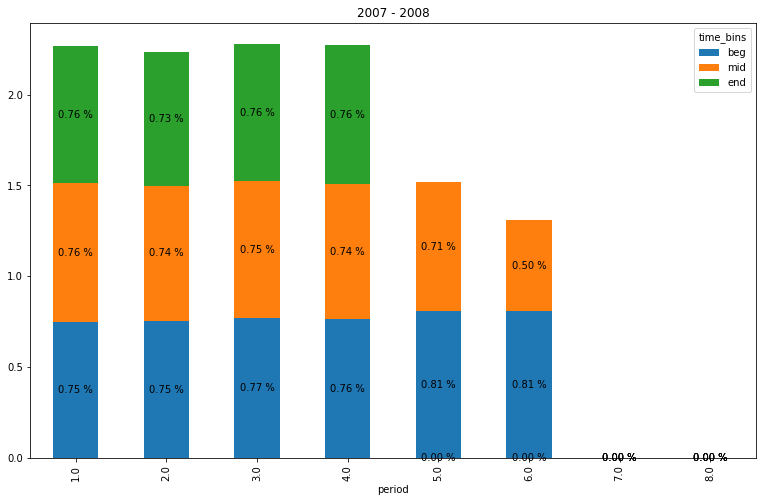

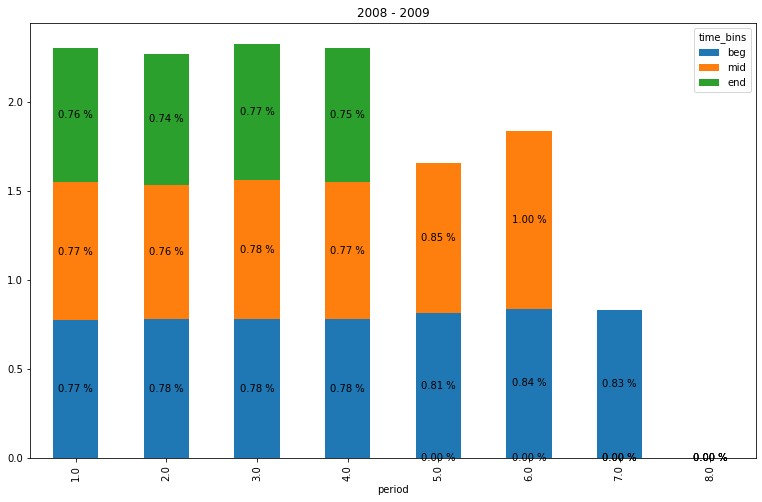

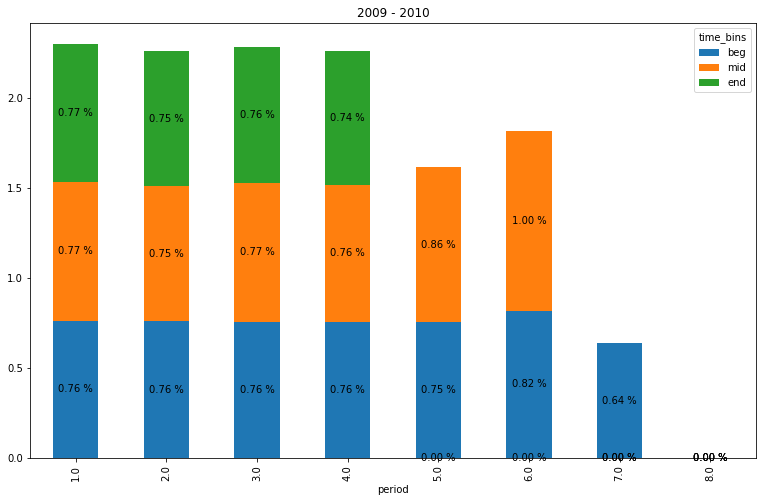

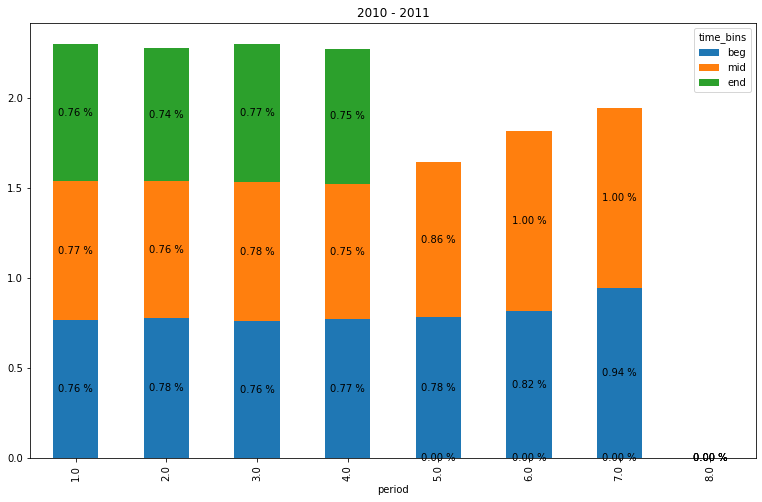

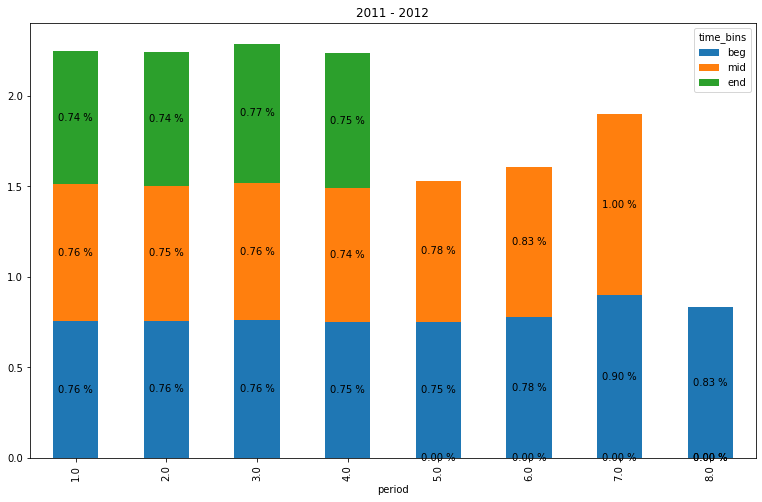

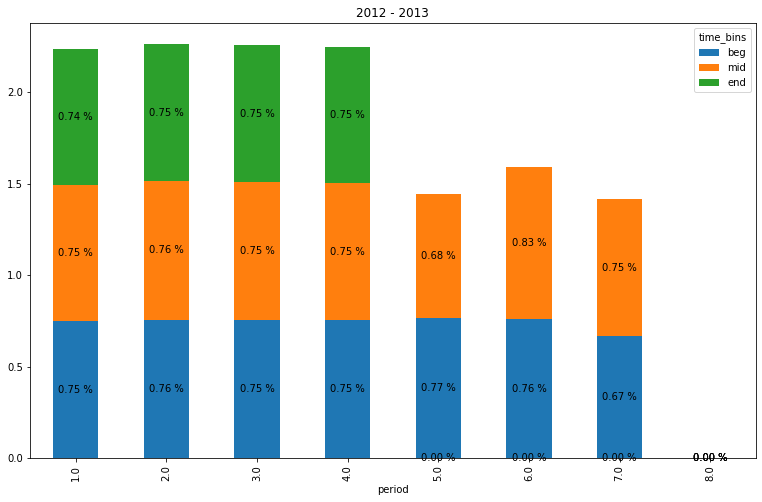

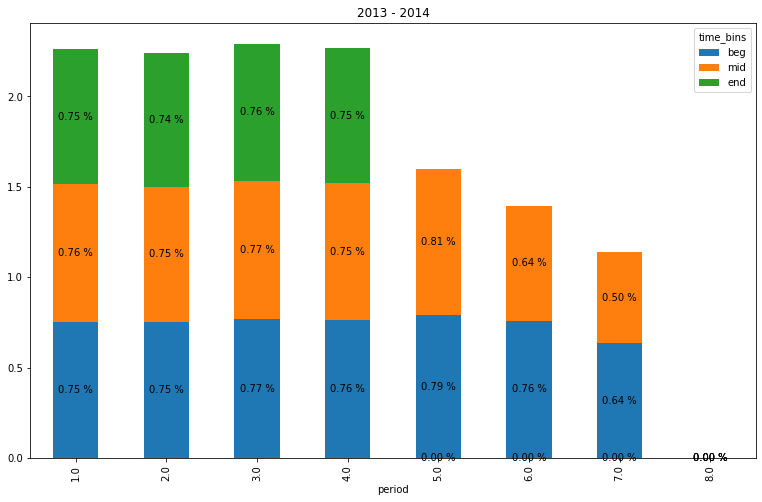

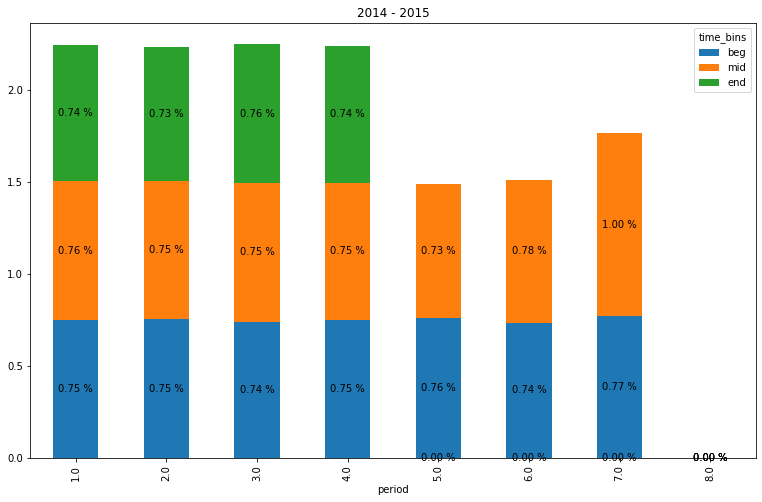

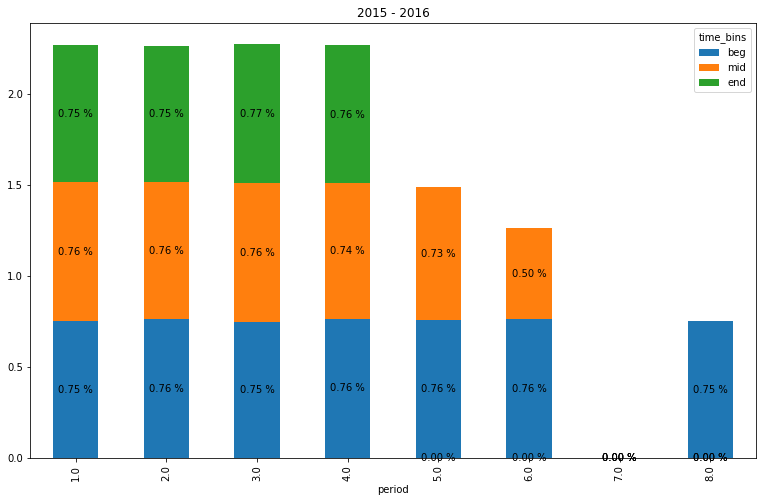

In [38]:
for tpe in avg_throws_bins.season.unique():
    pivot_df = avg_throws_bins[avg_throws_bins['season'] == tpe].pivot(index='period', columns='time_bins', values='shot_made')

    ax = pivot_df.loc[:,['beg','mid', 'end']].plot.bar(stacked=True, title=tpe)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.2f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')

* It looks like this is the case for each season as well. I am not sure whether this is some kinf of a rule in the game or there is something wrong with the code ??

In [39]:
for per in [4.0, 5.0, 6.0, 7.0, 8.0 ]:
    print(f'End of period: {per} shape: {plots[((plots.period == per) &(plots.time_bins == "end"))].shape}')

End of period: 4.0 shape: (43349, 14)
End of period: 5.0 shape: (0, 14)
End of period: 6.0 shape: (0, 14)
End of period: 7.0 shape: (0, 14)
End of period: 8.0 shape: (0, 14)


Check whther there is something wrong with the bins:

In [40]:
12*60 * (60/100)

432.0

In [41]:
plots[(
    (plots['seconds'] > 432) &
    (plots['period'] > 5.0)
)]

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time,count,seconds,time_bins


## <font color=red> It seems there are no free shots recorded in the data for end of periods 5 to 8 <font>

## Period time bins per player

In [42]:
player_throws_bins = plots[['player', 'period', 'shot_made', 'time_bins']].groupby(
    by=['player', 'period', 'time_bins']).mean().reset_index()#.set_index(['period'])
player_throws_bins.head()

,player,period,time_bins,shot_made
0,A.J. Price,1.0,beg,0.696970
1,A.J. Price,1.0,mid,0.800000
2,A.J. Price,1.0,end,1.000000
3,A.J. Price,2.0,beg,0.666667
4,A.J. Price,2.0,mid,0.666667


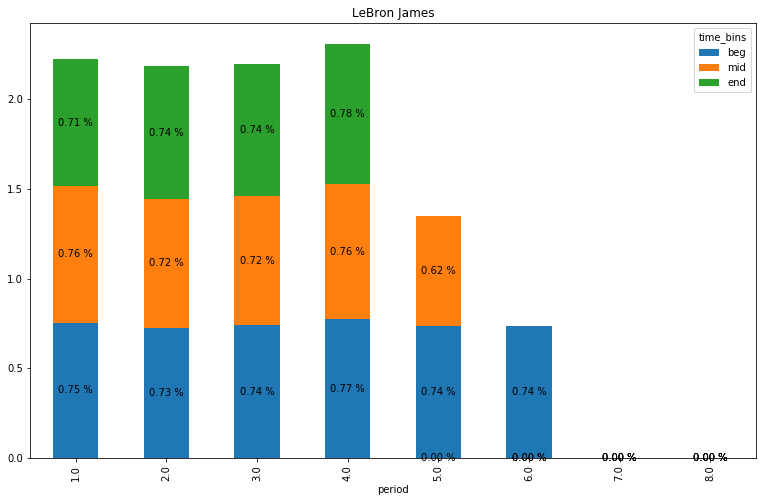

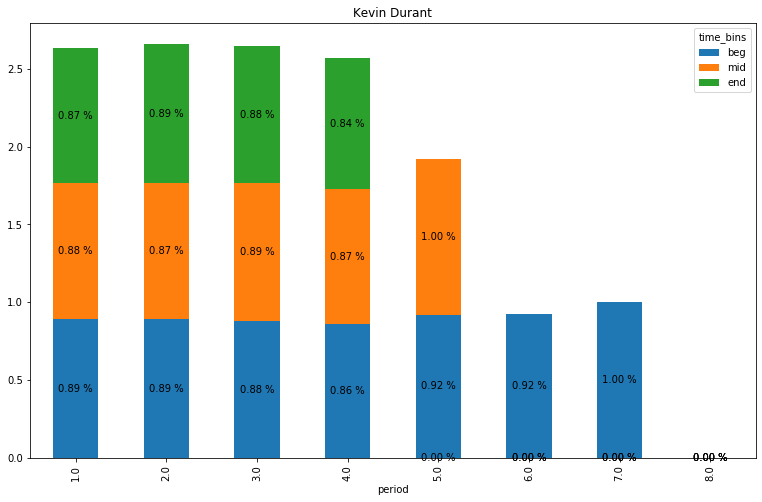

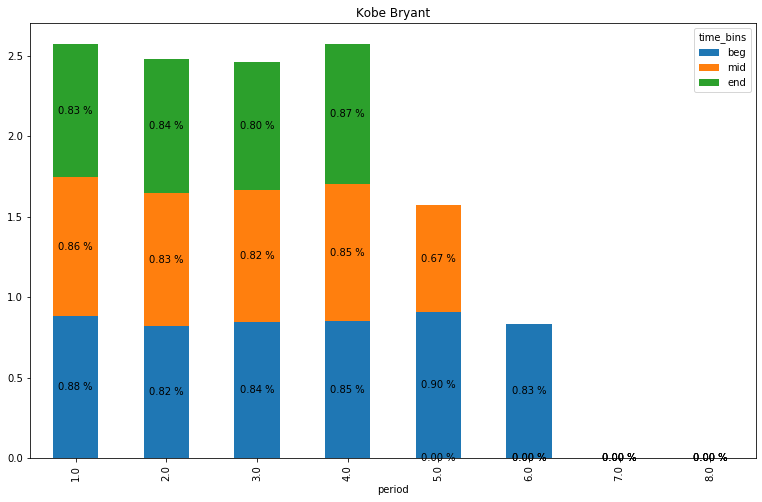

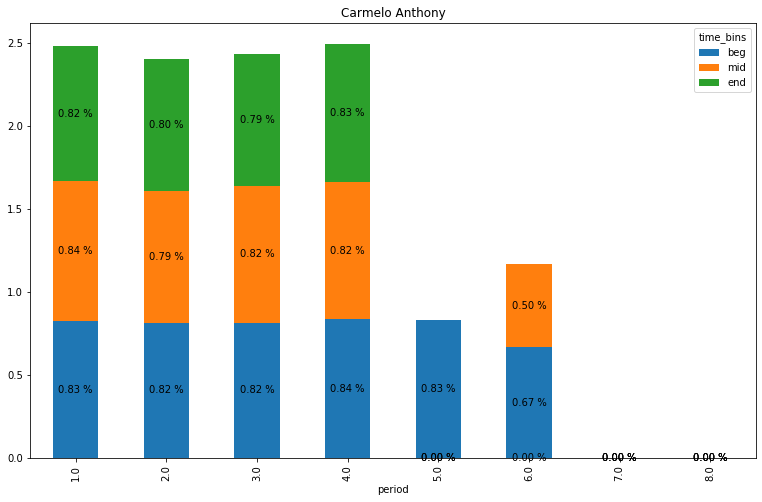

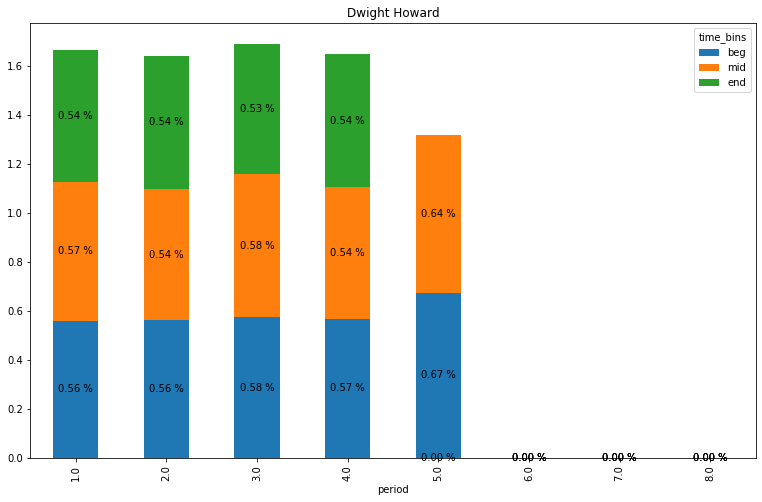

In [43]:
for pl in player_shots.head().index:
    pivot_df = player_throws_bins[player_throws_bins['player'] == pl].pivot(index='period', columns='time_bins', values='shot_made')

    ax = pivot_df.loc[:,['beg','mid', 'end']].plot.bar(stacked=True, title=pl)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.2f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')

<a id="solution"></a>
## <font color=red> Aha! After doing some research I found out that in a normal basketball game there are only 4 periods of 12 minutes. Anything after the fourth period is overtime periods, which are 5 minutes only. So the above question arises from a problem with the bins, as they need to be cutted separately for normal play time and overtime. <font>

<a id="fixed_time_bins"></a>
# <font color=green> Fixed bins!!! <font>
(still not normalised)

In [44]:
playtime = plots[plots['period'].isin([1.0,2.0,3.0,4.0])]
playtime.shape

(611568, 14)

In [45]:
plots.shape

(618019, 14)

In [46]:
playtime['fixed_time_bins'] = pd.cut(
    playtime['seconds'], 
    3, 
    labels =["beg","mid","end"], 
    include_lowest=True
)

/Users/HOP/anaconda3/envs/ff/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [47]:
overtime = plots[~plots['period'].isin([1.0,2.0,3.0,4.0])]
overtime.shape

(6451, 14)

In [48]:
overtime['fixed_time_bins'] = pd.cut(
    overtime['seconds'], 
    3, 
    labels =["beg","mid","end"], 
    include_lowest=True
)

/Users/HOP/anaconda3/envs/ff/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [49]:
new_plots = pd.concat([playtime, overtime])

In [50]:
assert new_plots.shape[0] == plots.shape[0]

<a id="time_bins_game_type"></a>
## Average shots made per period per type of game. Separated by beg/mid/end of period

In [51]:
avg_throws_bins = new_plots[['playoffs', 'period', 'shot_made', 'fixed_time_bins']].groupby(
    by=['playoffs', 'period', 'fixed_time_bins']).mean().reset_index()#.set_index(['period'])
avg_throws_bins.head()

,playoffs,period,fixed_time_bins,shot_made
0,playoffs,1.0,beg,0.758946
1,playoffs,1.0,mid,0.753263
2,playoffs,1.0,end,0.739444
3,playoffs,2.0,beg,0.752531
4,playoffs,2.0,mid,0.745559


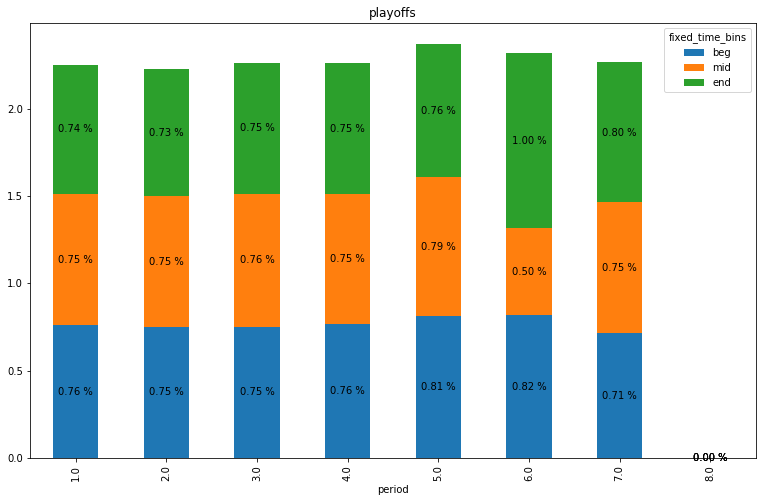

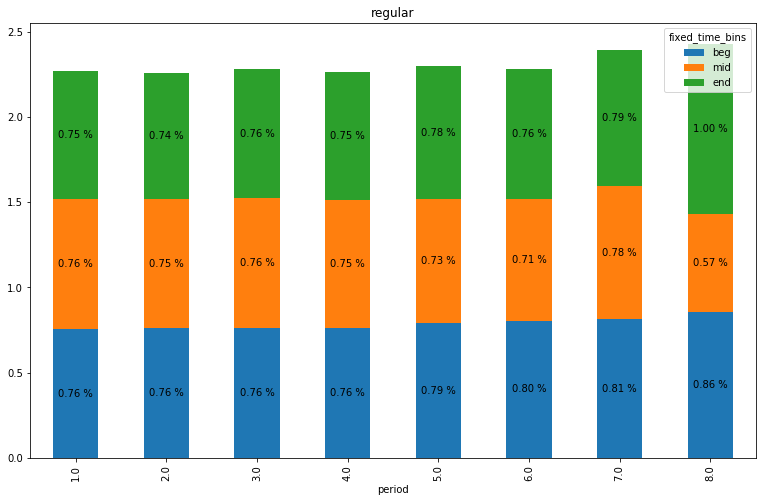

In [52]:
for tpe in avg_throws_bins.playoffs.unique():
    pivot_df = avg_throws_bins[avg_throws_bins['playoffs'] == tpe].pivot(index='period', columns='fixed_time_bins', values='shot_made')

    ax = pivot_df.loc[:,['beg','mid', 'end']].plot.bar(stacked=True, title=tpe)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.2f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')

<a id="time_bins_game_season_period"></a>
## Average shots made per season per period. Separated by beg/mid/end of period

In [53]:
avg_throws_bins = new_plots[['season', 'period', 'shot_made', 'fixed_time_bins']].groupby(
    by=['season', 'period', 'fixed_time_bins']).mean().reset_index()#.set_index(['period'])
avg_throws_bins.head()

,season,period,fixed_time_bins,shot_made
0,2006 - 2007,1.0,beg,0.749361
1,2006 - 2007,1.0,mid,0.738730
2,2006 - 2007,1.0,end,0.742227
3,2006 - 2007,2.0,beg,0.759262
4,2006 - 2007,2.0,mid,0.758540


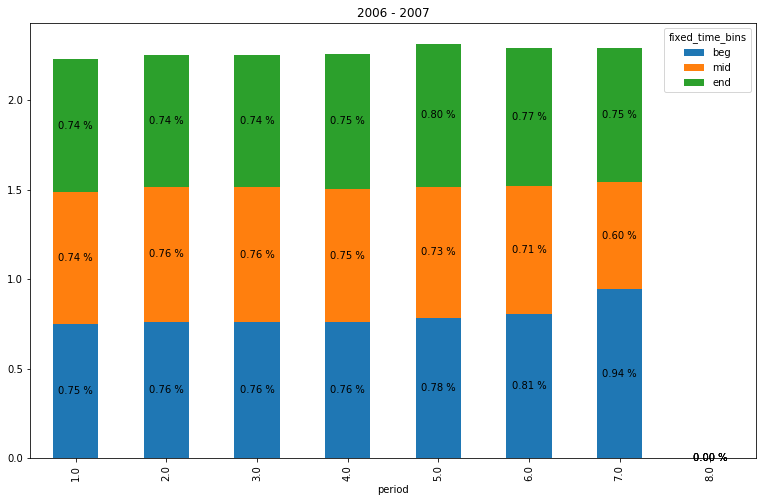

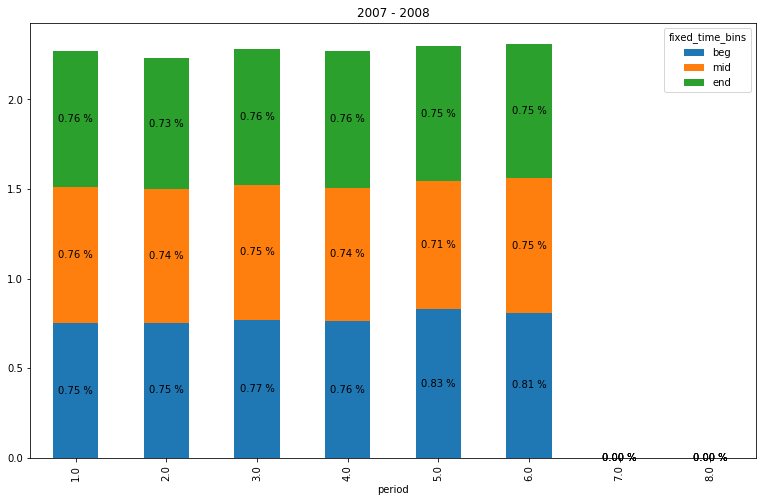

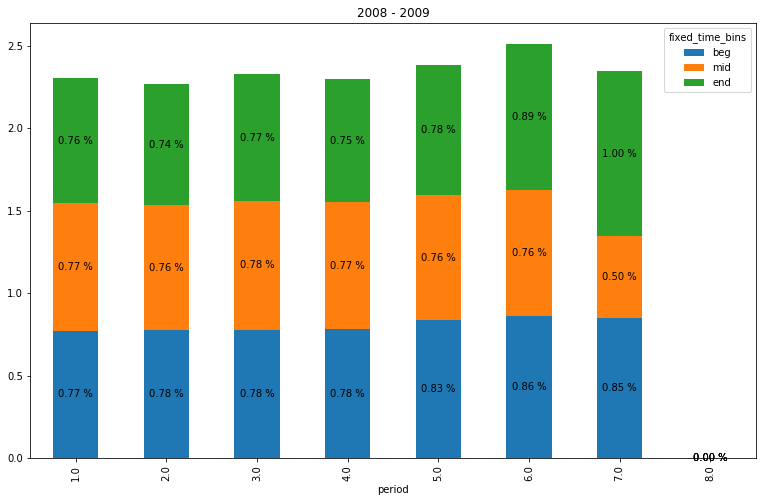

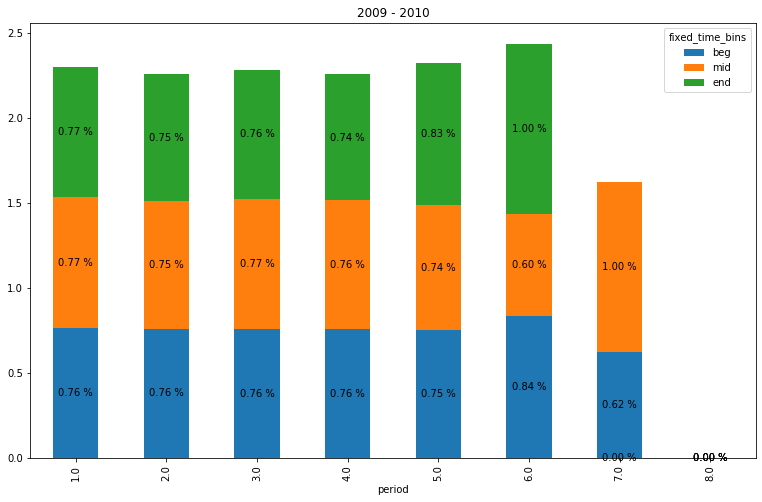

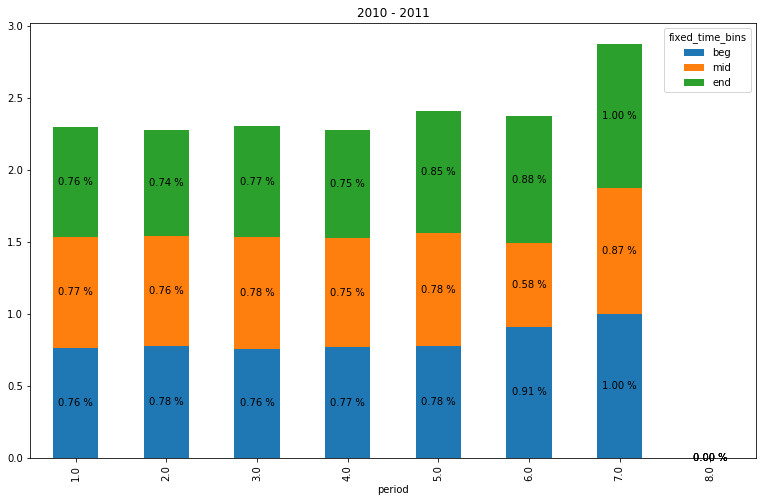

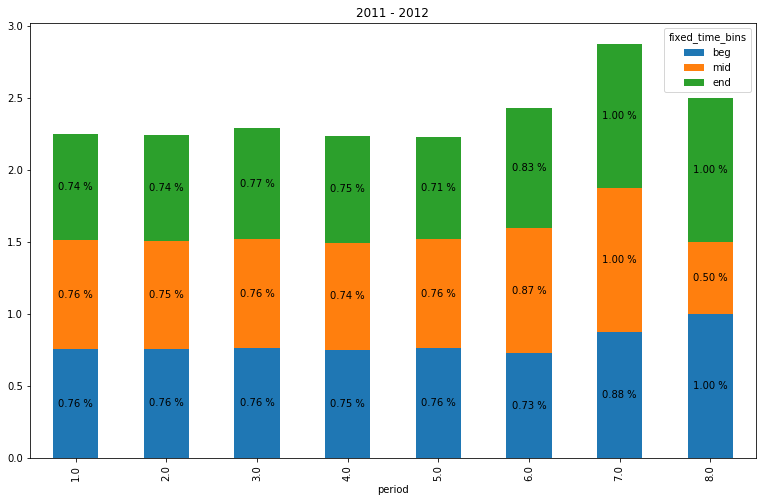

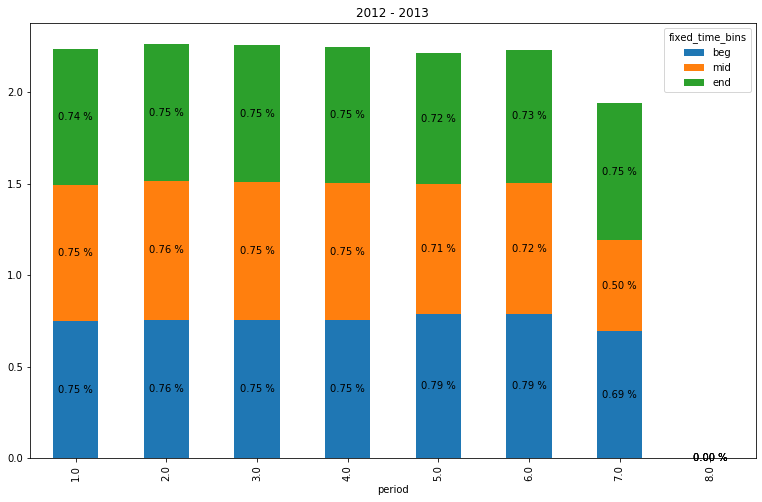

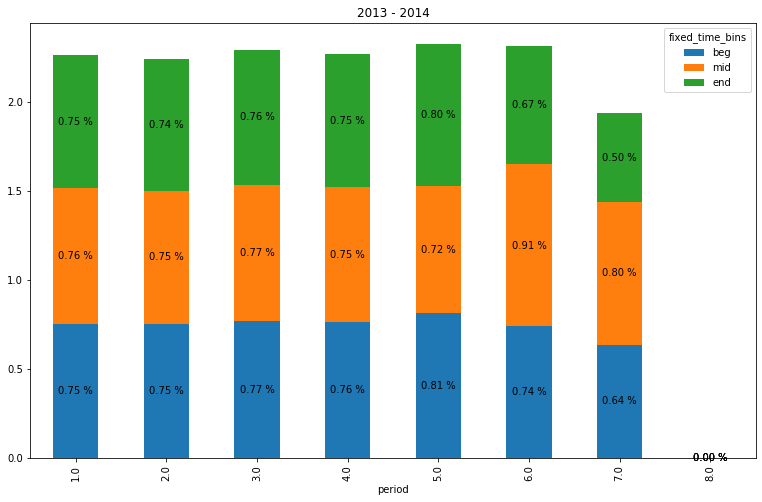

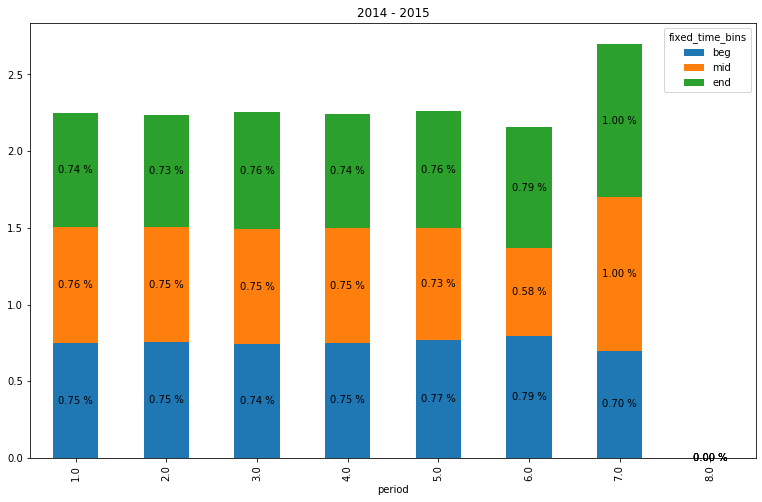

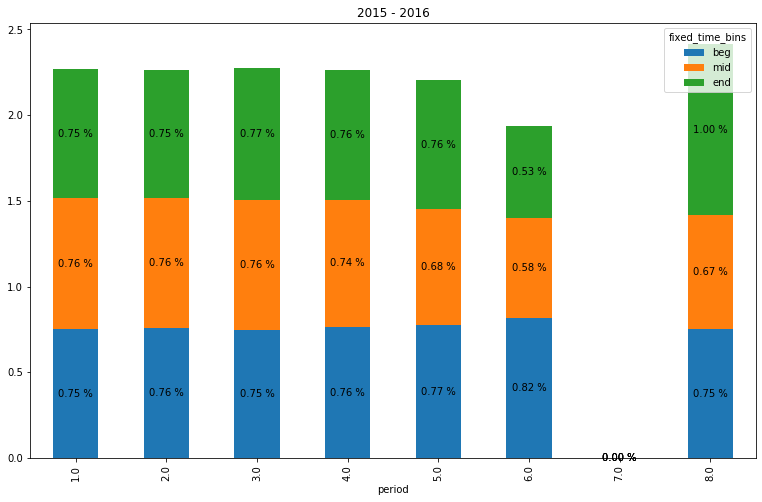

In [54]:
for tpe in avg_throws_bins.season.unique():
    pivot_df = avg_throws_bins[avg_throws_bins['season'] == tpe].pivot(index='period', columns='fixed_time_bins', values='shot_made')

    ax = pivot_df.loc[:,['beg','mid', 'end']].plot.bar(stacked=True, title=tpe)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.2f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')

<a id="time_bins_game_player_period"></a>
## Shots made by player per period. Separated by beg/mid/end of period

In [55]:
player_throws_bins = new_plots[['player', 'period', 'shot_made', 'fixed_time_bins']].groupby(
    by=['player', 'period', 'fixed_time_bins']).mean().reset_index()#.set_index(['period'])
player_throws_bins.head()

,player,period,fixed_time_bins,shot_made
0,A.J. Price,1.0,beg,0.696970
1,A.J. Price,1.0,mid,0.800000
2,A.J. Price,1.0,end,1.000000
3,A.J. Price,2.0,beg,0.666667
4,A.J. Price,2.0,mid,0.666667


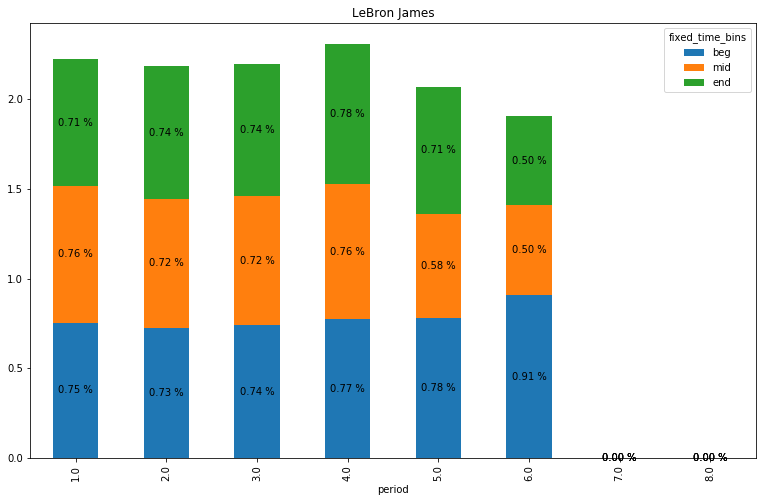

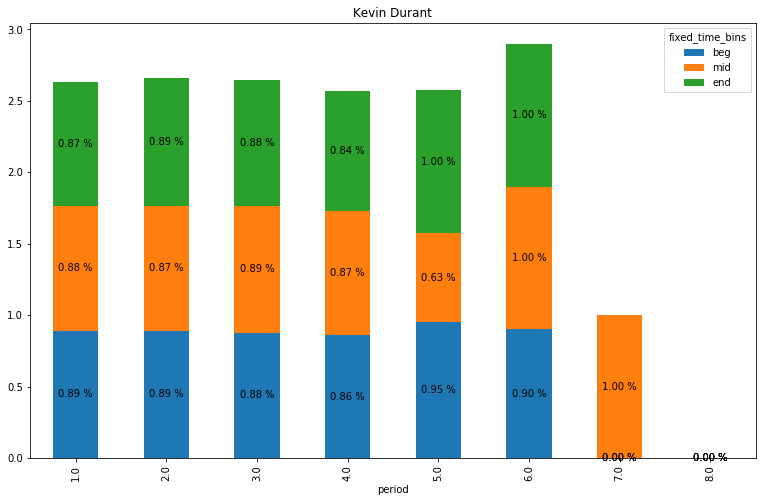

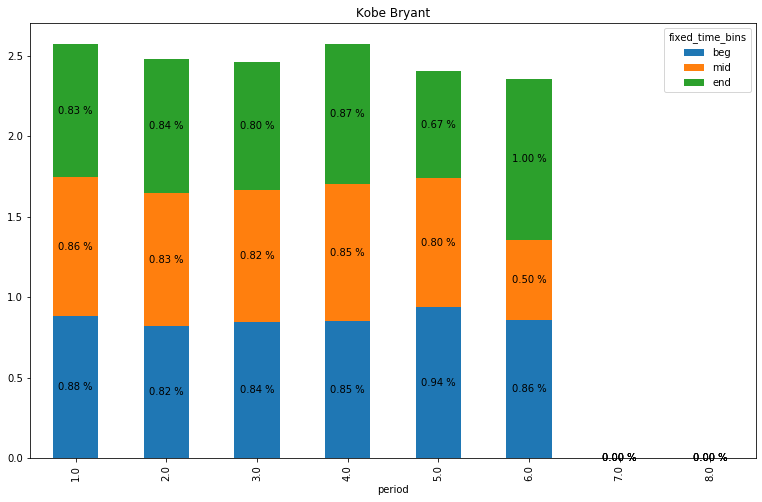

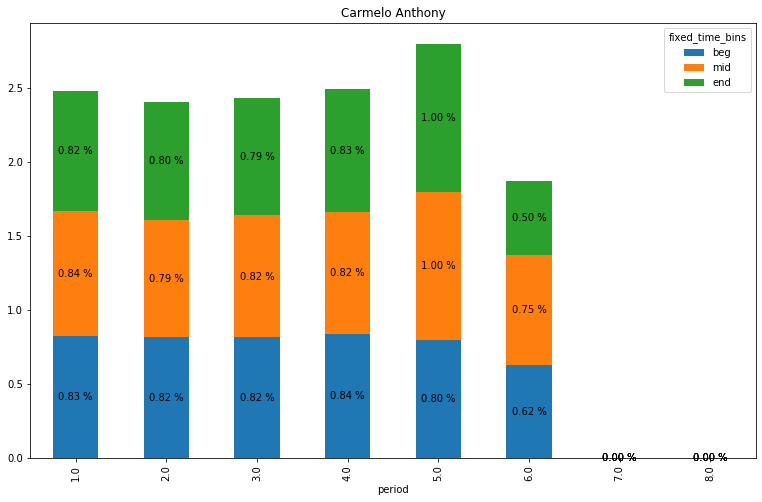

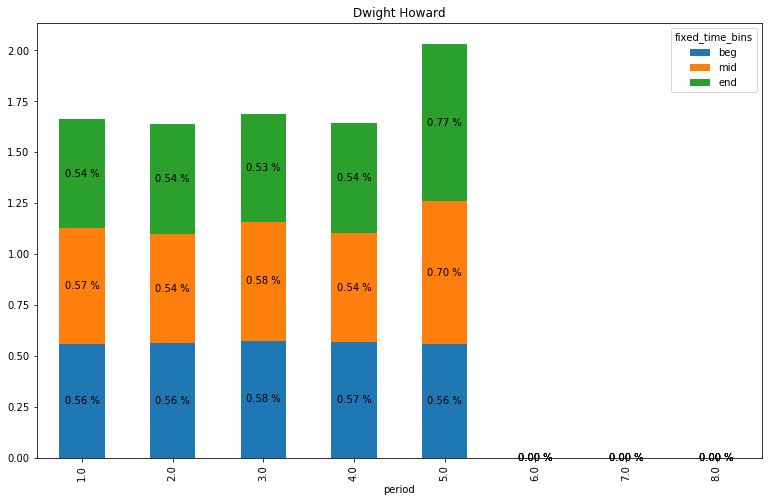

In [56]:
for pl in player_shots.head().index:
    pivot_df = player_throws_bins[player_throws_bins['player'] == pl].pivot(index='period', columns='fixed_time_bins', values='shot_made')

    ax = pivot_df.loc[:,['beg','mid', 'end']].plot.bar(stacked=True, title=pl)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.2f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')